# K-means implementation in Python using Sklearn/SciKit

### Imports

In [3]:
from sklearn.cluster import KMeans
from sklearn import datasets, metrics # Contains IRIS dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from subprocess import check_output, call
import time, re

# Plotting graph
import matplotlib.pyplot as plt

### Data loading

In [4]:
# IRIS data loading
iris = datasets.load_iris()
iris_data = iris.data[:, :2]
iris_label = iris.target

# BME data loading
bme_file = open("datasets/BME_MOD.txt", "r")
bme_data = []
for line in bme_file:
    bme_data.append(line.split())
    for i in range(0, 129):
        bme_data[-1][i] = float(bme_data[-1][i])


# Confirm all 180 time series (train + test) loaded into array
len(bme_data)

# Convert python array to numpy array
bme_data = np.array(bme_data)

# Scaling data
scaler = MinMaxScaler()
bme_data = scaler.fit_transform(bme_data)

### K-Means

In [5]:
# start a timer
start = time.time()
kmeans_iris = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(iris_data)
kmeans_iris_label = kmeans_iris.fit_predict(iris_data)
end = time.time()
print("Time taken for IRIS dataset: ", end - start)
start = time.time()
kmeans_bme = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(bme_data)
kmeans_bme_label = kmeans_bme.fit_predict(bme_data)
end = time.time()
print("Time taken for BME dataset: ", end - start)

Time taken for IRIS dataset:  0.13312530517578125
Time taken for BME dataset:  0.016843080520629883


### Plotting

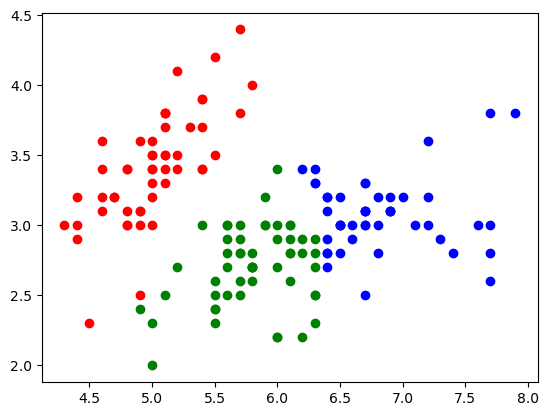

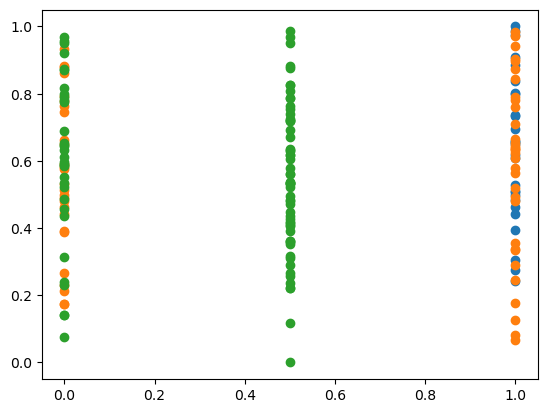

In [6]:
#filter rows of original data
filtered_label0 = iris_data[kmeans_iris_label == 0]
filtered_label1 = iris_data[kmeans_iris_label == 1]
filtered_label2 = iris_data[kmeans_iris_label == 2]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'blue')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.show()

#filter rows of original data
filtered_label0 = bme_data[kmeans_bme_label == 0]
filtered_label1 = bme_data[kmeans_bme_label == 1]
filtered_label2 = bme_data[kmeans_bme_label == 2]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1])
plt.show()

### Get the results from the C implementation of k-means

In [7]:
# use subprocess to compile as 'gcc k-means'
call(['gcc', 'k-means.c'])
# use subprocess.check_output of command './a.out bme 5'
output = check_output(['./a.out', 'bme', '5']).decode('utf-8')
print(output)
# use regex to extract the time taken
time_taken = re.findall(r'Time elapsed: (.*)', output)[0]
print(time_taken)
# use regex to find all mappings
mappings = re.findall(r'S:(.*) -> C:(.*)', output)
print(mappings)




Centroid 1: -0.01 -0.01 0.00 0.02 0.02 0.03 0.04 0.05 
0.01 0.04 0.05 0.05 0.04 0.04 0.01 0.01 
0.01 0.03 0.02 0.05 0.05 0.02 0.01 0.04 
0.01 0.01 0.03 0.02 0.04 0.02 0.01 0.03 
0.04 0.04 0.01 0.01 0.05 0.10 0.38 0.66 
0.81 0.89 0.92 0.93 0.94 0.94 0.94 0.94 
0.95 0.95 0.95 0.95 0.94 0.94 0.95 0.95 
0.95 0.95 0.95 0.95 0.94 0.94 0.94 0.94 
0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 
0.94 0.94 0.94 0.93 0.93 0.93 0.93 0.93 
0.93 0.94 0.94 0.94 0.94 0.94 0.94 0.94 
0.95 0.95 0.95 0.95 0.95 0.94 0.94 0.94 
0.95 0.95 0.94 0.94 0.94 0.94 0.94 0.84 
0.56 0.28 0.12 0.05 0.05 0.05 0.02 0.02 
0.03 0.01 0.05 0.02 0.02 0.04 0.03 0.01 
0.02 0.04 0.04 0.02 0.01 0.01 0.02 0.04 
Centroid 2: 0.01 0.01 0.01 0.04 0.04 0.02 -0.00 0.02 
-0.00 -0.00 0.03 0.00 0.00 0.05 0.00 0.01 
0.02 0.00 0.02 0.00 0.04 0.03 0.03 0.04 
0.04 0.04 0.04 0.01 0.02 0.04 0.03 0.01 
0.00 0.05 0.01 0.03 0.05 0.03 0.02 0.01 
0.04 0.01 0.02 0.13 0.48 0.84 1.04 1.14 
1.18 1.19 1.19 1.20 1.20 1.20 1.20 1.20 
1.20 1.20 1.20 1.21 1.21 1.2

k-means.c: In function ‘kmeans’:
k-means.c:140:46: warning: passing argument 3 of ‘displayCentroids’ from incompatible pointer type [-Wincompatible-pointer-types]
  140 |     displayCentroids(clusters, observations, centroids);
      |                                              ^~~~~~~~~
      |                                              |
      |                                              double *
k-means.c:27:62: note: expected ‘double (*)[(sizetype)(observations)]’ but argument is of type ‘double *’
   27 | void displayCentroids(int clusters, int observations, double centroids[][observations]) {
      |                                                       ~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~
k-means.c:166:46: warning: passing argument 3 of ‘displayCentroids’ from incompatible pointer type [-Wincompatible-pointer-types]
  166 |     displayCentroids(clusters, observations, centroids);
      |                                              ^~~~~~~~~
      |                            

### RAND Score

In [11]:
# Manual labeling of BME data
bme_label = np.full((60), 0)
bme_label = np.append(bme_label, np.full((60), 1))
bme_label = np.append(bme_label, np.full((60), 2))

kmeans_iris_pred = np.array([1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,2,2,1,2,2,2,2,1,2,1,1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,2,2,1,2,1,2,1,3,3,3,3,3,3,3,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])
kmeans_bme_pred = np.array([3,2,2,1,3,3,2,1,1,3,1,3,3,3,3,2,3,2,2,1,1,3,1,1,2,3,2,1,1,3,2,1,2,1,2,3,1,2,3,1,3,3,2,1,3,2,3,3,3,1,2,1,1,1,2,2,1,2,2,1,1,1,1,1,2,2,1,1,1,2,2,1,2,2,2,1,1,2,1,2,1,1,2,2,2,2,1,2,2,1,2,2,1,1,1,1,2,2,1,2,3,1,3,3,1,1,2,1,2,3,1,1,3,1,3,1,1,3,2,3,3,2,1,1,3,2,1,3,3,3,1,3,3,1,1,1,3,3,2,3,3,3,3,3,1,1,3,3,3,3,3,3,3,1,3,3,3,3,2,1,1,2,2,2,1,1,1,2,2,1,3,3,2,3,2,1,3,3,3,3])

print("RAND Scores:\n IRIS - Sklearn, K-Means:", metrics.rand_score(iris_label, kmeans_iris_label))
print("BME - Sklearn, K-Means:", metrics.rand_score(bme_label, kmeans_bme_label))
print("IRIS - C, K-Means:", metrics.rand_score(iris_label, kmeans_iris_pred))
print("BME - C, K-Means:", metrics.rand_score(bme_label, kmeans_bme_label))

RAND Scores:
 IRIS - Sklearn, K-Means: 0.8171812080536913
BME - Sklearn, K-Means: 0.711173184357542
IRIS - C, K-Means: 0.7214317673378076
BME - C, K-Means: 0.711173184357542
